In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carregando os dados
df = pd.read_csv('nba_treino.csv')  # Substitua 'seu_arquivo.csv' pelo nome do seu arquivo

# Selecionando apenas os atributos para o k-Means
atributos_selecionados = ['FGA', 'FGM']
X = df[atributos_selecionados]

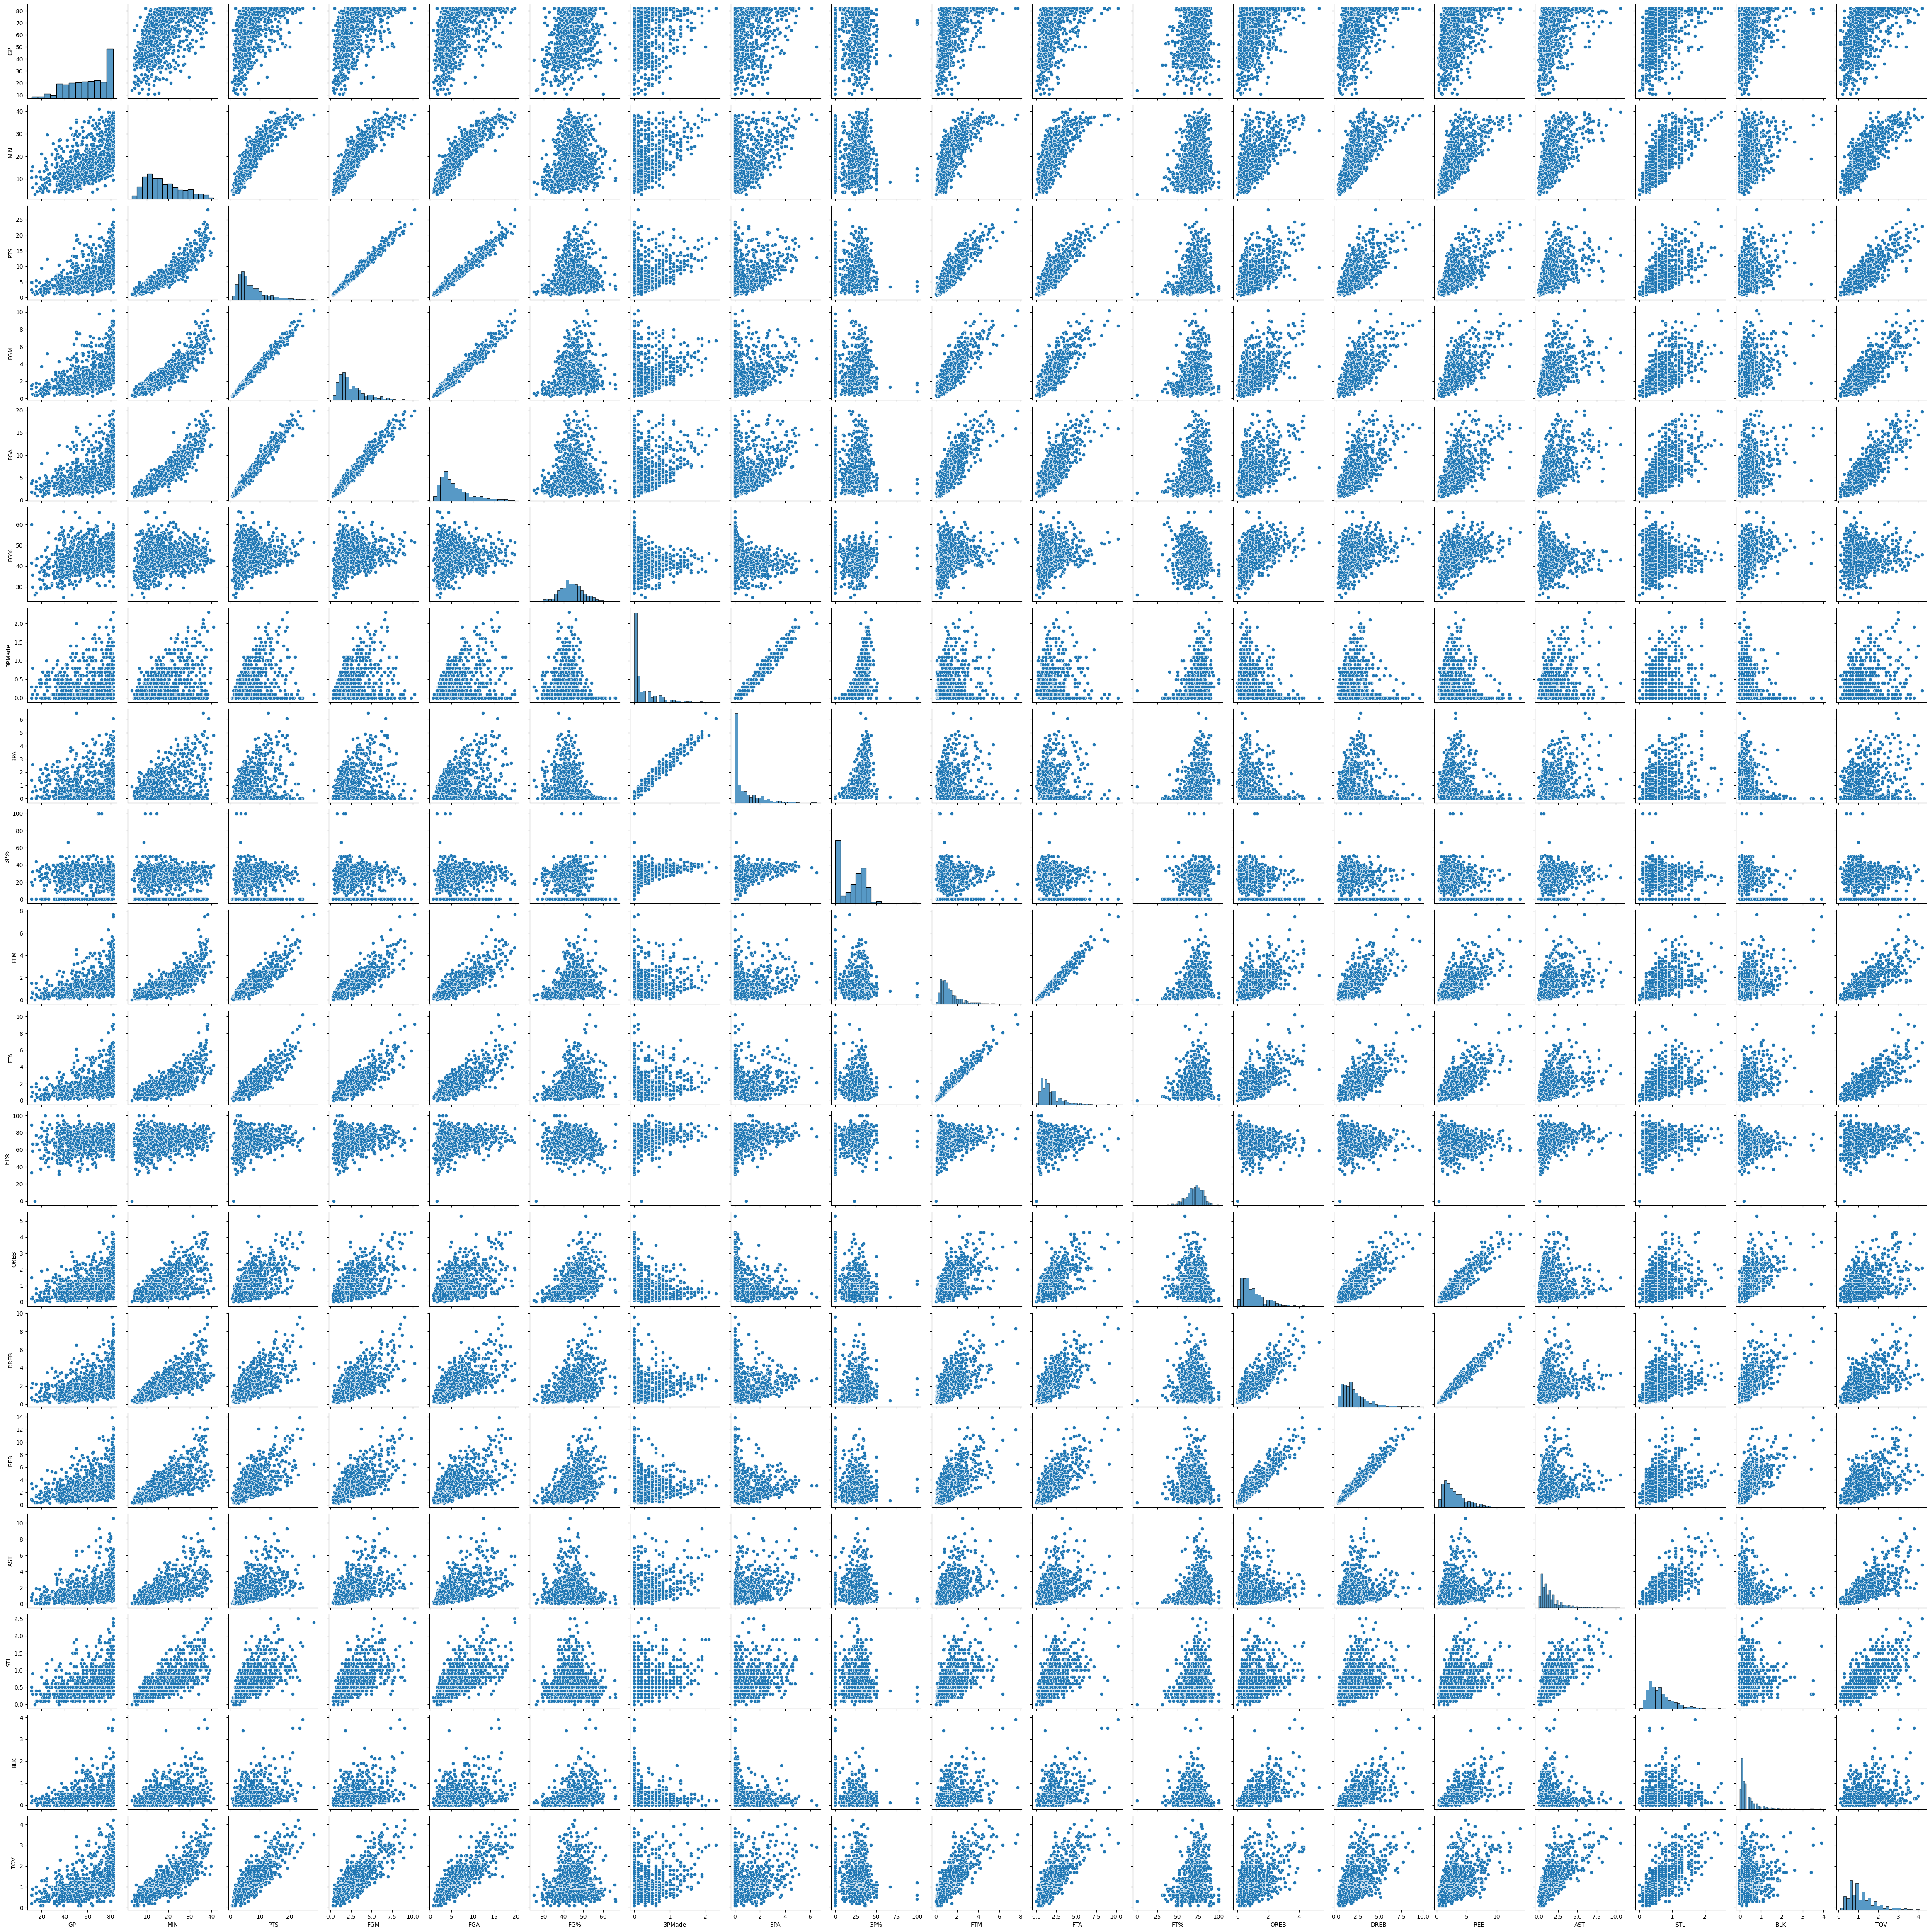

In [13]:
sns.pairplot(X)

In [4]:
# Função para inicializar centróides aleatórios
def inicializar_centroides(X, k):
    indices_aleatorios = np.random.choice(X.shape[0], k, replace=False)
    return X.iloc[indices_aleatorios].to_numpy()

In [5]:
# Função para calcular a distância euclidiana entre dois pontos
def distancia_euclidiana(ponto1, ponto2):
    return np.sqrt(np.sum((ponto1 - ponto2) ** 2))

In [6]:
# Função para atribuir pontos aos clusters
def atribuir_aos_clusters(X, centroides):
    clusters = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distancias = [distancia_euclidiana(X.iloc[i].to_numpy(), centroide) for centroide in centroides]
        clusters[i] = np.argmin(distancias)
    return clusters

In [7]:
# Função para atualizar os centróides
def atualizar_centroides(X, clusters, k):
    centroides = np.zeros((k, X.shape[1]))
    for j in range(k):
        membros_cluster = X[clusters == j]
        if len(membros_cluster) > 0:
            centroides[j] = membros_cluster.mean(axis=0)
    return centroides

In [8]:
# Função principal do k-Means
def kmeans(X, k, max_iter=100):
    centroides = inicializar_centroides(X, k)
    
    for _ in range(max_iter):
        clusters = atribuir_aos_clusters(X, centroides)
        novos_centroides = atualizar_centroides(X, clusters, k)
        
        # Verificar convergência
        if np.all(centroides == novos_centroides):
            break
        
        centroides = novos_centroides
    
    return clusters, centroides

In [17]:
# Função para visualizar os resultados
def visualizar_resultados(X, clusters, centroides, k):
    # Adicionando coluna 'Cluster' ao DataFrame original
    df['Cluster'] = clusters
    
    # Visualizando a distribuição dos clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=50, legend='full')
    plt.scatter(centroides[:, 0], centroides[:, 1], marker='X', s=200, color='red', label='Centróides')
    plt.title(f'k-Means com k={k}')
    plt.xlabel(atributos_selecionados[0])
    plt.ylabel(atributos_selecionados[1])
    plt.legend()
    plt.show()

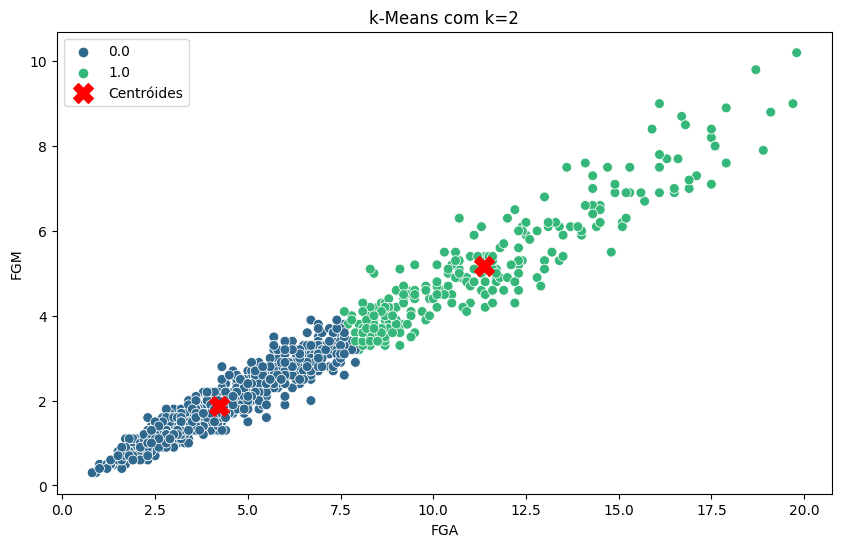

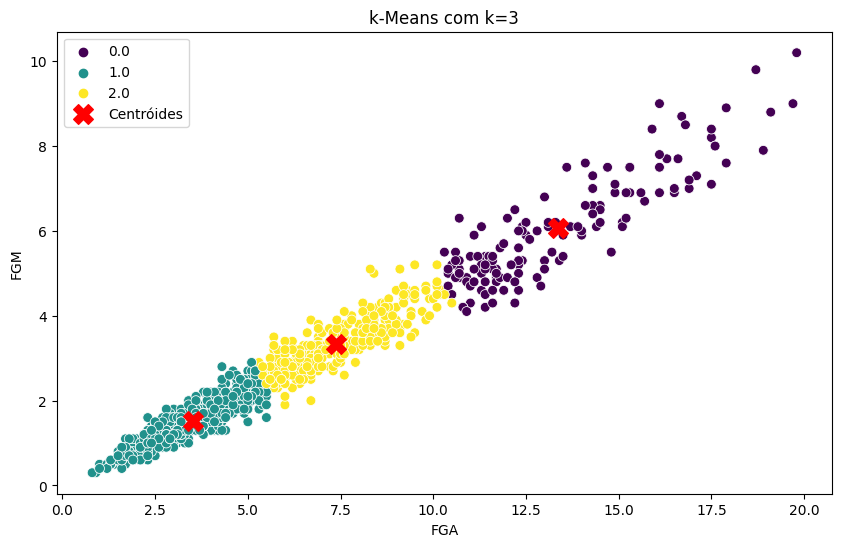

In [18]:
# Testando o k-Means com diferentes valores de k
valores_k = [2, 3]
for k in valores_k:
    clusters, centroides = kmeans(X, k)
    visualizar_resultados(X, clusters, centroides, k)

In [11]:
#Extra
from sklearn.cluster import KMeans
def aplicar_kmeans_e_visualizar(X, k):
    # Criando o modelo k-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Treinando o modelo
    kmeans.fit(X)
    
    # Obtendo os centróides dos clusters
    centróides = kmeans.cluster_centers_
    
    # Adicionando coluna 'Cluster' ao DataFrame original
    df['Cluster'] = kmeans.labels_
    
    # Visualizando os centróides
    print(f'\nCentróides para k={k}:\n{centróides}\n')
    
    # Visualizando a distribuição dos clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=50, legend='full')
    plt.scatter(centróides[:, 0], centróides[:, 1], marker='X', s=200, color='red', label='Centróides')
    plt.title(f'k-Means com k={k}')
    plt.xlabel('Atributo 1')
    plt.ylabel('Atributo 2')
    plt.legend()
    plt.show()


Centróides para k=2:
[[44.22427984 11.92860082  4.15144033  1.60761317  3.74958848 42.71131687
   0.15967078  0.53580247 16.06460905  0.78004115  1.14855967 67.5526749
   0.70823045  1.35185185  2.05967078  0.89958848  0.40308642  0.25
   0.77530864]
 [73.55290102 22.57935154  9.16535836  3.5390785   7.78754266 45.37320819
   0.33464164  1.01535836 22.01552901  1.75494881  2.41313993 72.88720137
   1.27440273  2.64880546  3.92303754  2.06962457  0.79846416  0.47201365
   1.54778157]]



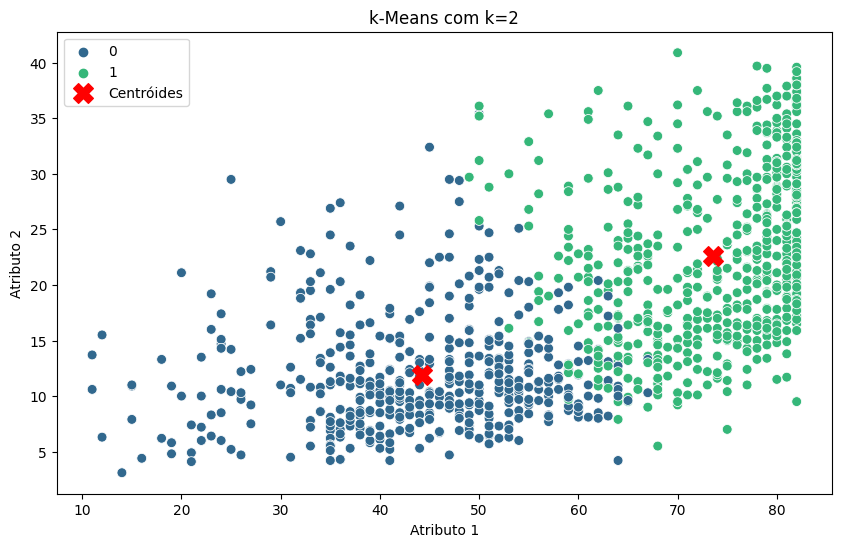


Centróides para k=3:
[[6.62578616e+01 1.74968553e+01 6.71100629e+00 2.66226415e+00
  5.44559748e+00 4.85443396e+01 9.43396226e-04 5.18867925e-02
  1.20471698e+00 1.38333333e+00 2.08553459e+00 6.60867925e+01
  1.47641509e+00 2.57547170e+00 4.05691824e+00 1.02389937e+00
  5.42138365e-01 5.94968553e-01 1.16635220e+00]
 [7.23890215e+01 2.29205251e+01 9.37875895e+00 3.58353222e+00
  8.14152745e+00 4.37121718e+01 4.84964200e-01 1.44057279e+00
  3.12837709e+01 1.73269690e+00 2.30000000e+00 7.52928401e+01
  1.02792363e+00 2.37446301e+00 3.40047733e+00 2.36515513e+00
  8.47255370e-01 3.58472554e-01 1.56563246e+00]
 [3.93850746e+01 1.15256716e+01 3.95432836e+00 1.51373134e+00
  3.70985075e+00 4.05788060e+01 2.09552239e-01 7.02388060e-01
  2.15447761e+01 7.21194030e-01 1.03104478e+00 6.85946269e+01
  5.69552239e-01 1.18000000e+00 1.74626866e+00 9.95223881e-01
  4.07164179e-01 1.75223881e-01 7.66865672e-01]]



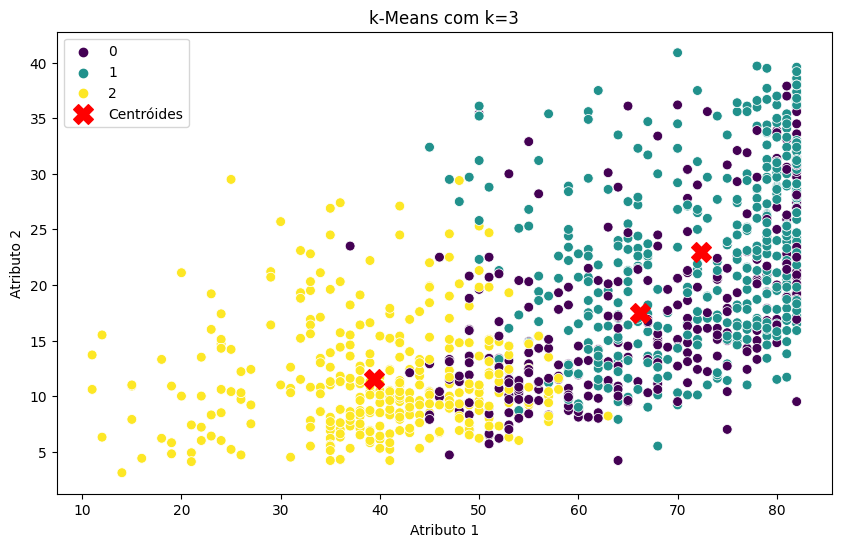

In [12]:
# Testando o k-Means do SKlearn com diferentes valores de k
valores_k = [2, 3]
for k in valores_k:
    aplicar_kmeans_e_visualizar(X, k)